# Анализ индустрии компьютерных игр

Заказчик - интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Целью проекта является выявление закономерностей, определяющих успешность игры. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Анализ проводится на основе исторических данных (c 1980 по 2016 года) из открытых источников, которые содержат информацию о продажах игр, оценках пользователей и экспертов, жанрах и платформах.  

## Cодержание

 1. [Изучение данных](#step2)  
 2. [Предобработка данных](#step3)    
 3. [Анализ данных](#step4)
 4. [Портрет пользователей](#step5)
 5. [Проверка гипотез](#step6)  
 6. [Общие выводы](#step7)


## Изучение данных <a id="step2"></a> 

In [1]:
#импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sns

In [2]:
df=pd.read_csv('/datasets/games.csv')

In [3]:
df

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Мы видим, что тип данных у года выпуска игры и оценки игроков определен некорректно.

In [5]:
#определим долю пропусков по каждой переменной
df.isnull().mean()

Name               0.000120
Platform           0.000000
Year_of_Release    0.016093
Genre              0.000120
NA_sales           0.000000
EU_sales           0.000000
JP_sales           0.000000
Other_sales        0.000000
Critic_Score       0.513192
User_Score         0.400897
Rating             0.404786
dtype: float64

In [6]:
#проверим одновременно ли пропущены значения по наименованию и жанру
mask = df['Name'].isnull() | df['Genre'].isnull()
df[mask]

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


* Name   - 0.012% пропусков. Причиной появления подобных пропусков может быть техническая ошибка при выгрузке данных. Учитывая, незначительное число пропущенных значений - данные наблюдения можно удалить из выборки без дальнешего искажения результатов анализа данных.
* Genre  - 0.12% пропусков. Значения одновременно пропущенны и по названию и по жанру, поэтому после удаления пропусков по наименованию игры у нас одновременно не будет пропусков по жанру.
* Year_of_Release  -  16.1% пропусков. Данные пропуски могли возникнуть в случае отсутствия информации о дате релиза в системе, с которой производилась выгрузка данных. Если бы игр с прпущенным годом выпуска было не в количестве 232, то можно было бы посмотреть в интернете год выпуска данных игр. Однако в нащем случае, это будет слишком трудоемко искать годы выпуска для 232 игр, поэтому оставим пропуски по данной переменной.
* Critic_Score - 51.32% пропусков. Значения по оценке критиков могут быть пропущены из-за того, что в системе, которой представлены данные, не были опубликованы отзывы экспертов по ряду игр. Несмотря на большое количество пропсуков, заменить их на какие-либо правдоподобные значения без значительного смещения результатов не представляется возможным.
* User_Score - 40.1% пропусков. По аналогии с пропусками в оценке критиков не представляется возможным подобрать замену для пропусков, которая  бы в дальнейшем не искажала результаты анализа.  
* Rating - 40.48% пропусков. Пропущенные значения по рейтингу имеются у игр, выпущенных в различные года - для игр выпущенных до 1994 года значения могут быть пропущены по причине того, что организация ESRB еще не была основана. Также ряд других пропущенных значений может объясняться тем, что разработчики некоторых игр не отправляли их в организацию ESRB для присвоения рейтинга. Заменить данные пропущенные значения нельзя, так как на основе имеющихся данных достаточно сложно подобрать варианты подходящих замен, которые бы в последствии не исказили данные.  

In [7]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [8]:
len(df.query('User_Score=="tbd"'))

2424

Стоит обратить внимание на значение "tbd" (to be determined)- что в переводе означает будет утверждено. Вероятно, на момент выгрузки данных системой еще не была подсчитана оценка пользователей, из-за малого количества оставленных отзывов об игре или из-за их полного отсутствия.

In [9]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

[***Расшифровка рейтингов ESRB***](https://ru.wikipedia.org/wiki/Entertainment_Software_Rating_Board)

* **«EC» («Early childhood») — для детей от 3 лет и старше** и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры. 

* **«E» («Everyone») — для возрастной категории от 6 лет и старше;** такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. Первоначально "K-A" ("Kids to Adults")

* **«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»:** проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. 

* **«T» («Teen») — игра подходит для лиц от 13 лет и старше.** Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

* **«M» («Mature») — не подходят для подростков младше 17 лет.** Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

* **«AO» («Adults Only 18+») —  игры только для взрослых старше 18 лет.** Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением.

* **«RP» («Rating Pending») — «Рейтинг ожидается»:** продукт был отправлен в ESRB и ожидает присвоения рейтинга. 

Рейтинг K-A - можем заменить на EC, учитывая, что разные наименования использовались в разное время для одной и той же категории игр.

### Вывод

На основе первичного изучения данных можно выявить следущие проблемы в данных:

1. Наименования столбцов необходимо привести к нижнему регистру, для дальнейшего удобства при проведении анализа.
2. Присутствуют пропущенные значения в переменных, некоторые из которых необходимо обработать.
3. Замена типа данных переменных года выпуска и оценок критиков и игроков. Год выпуска можно не приводить к формату даты, а привести просто к целочисленному типу, так как в дате присутствует только год. Оценки пользователей необходимо привести к числовому типу данных.
4. Заменить значения K-A в рейтинге на EC во избежании дублирования одной и той же категории игр.

## Предобработка данных <a id="step3"></a> 

* **Приведение наименования перменных к нижнему регистру**

In [10]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

* **Обработка пропусков**

Как было объяснено на предыдущем шаге - мы удалим две строки, по котрым отсутствуют наименование игры и её жанр.

In [11]:
df=df.dropna(subset=['name']) 

Значения "tbd" заменим на пропущенные, так как спрогнозировать их величину не представляется возможным. Удалить данные наблюдения также нельзя из-за достаточно большого количества. А приведение к пропущенному значению в дальнейшем поможет в приведении переменной к необходимому типу данных.

In [12]:
pd.options.mode.chained_assignment = None
df['user_score']=df['user_score'].replace("tbd",np.nan)

Заменим наименование рейтинга К-А на ЕС, так как они обозначают одну и ту же категорию игр.

In [13]:
df['rating']=df['rating'].replace("K-A","EC")

In [14]:
#замена пропущенных значений
df['rating']=df['rating'].fillna("Unknown")

* **Замена типа данных**

In [15]:
#приводим к числовому типу данных оценки пользователей
df['user_score']= pd.to_numeric(df['user_score'])
df['critic_score']= pd.to_numeric(df['critic_score'])

In [16]:
#приводим к целочисленному типу данных год релиза игры
df['year_of_release']=df['year_of_release'].astype('Int64')

In [17]:
#проверяем замену типа данных
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
name               16713 non-null object
platform           16713 non-null object
year_of_release    16444 non-null Int64
genre              16713 non-null object
na_sales           16713 non-null float64
eu_sales           16713 non-null float64
jp_sales           16713 non-null float64
other_sales        16713 non-null float64
critic_score       8137 non-null float64
user_score         7590 non-null float64
rating             16713 non-null object
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


* **Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.**

In [18]:
df['total_sale']=df['na_sales']+df['eu_sales']+df['jp_sales']+df['other_sales']

* **Проверка наличия дубликатов в данных**

In [19]:
#проверка дублирующих строк
df.duplicated().sum()

0

Дублирующие строки отсутствуют.

### Вывод

В результате предобработки данных мы привели наименования стоблцов к нижнему регистру для дальнейшего удобства, обработали пропуски, где это было возможно, обработали значения "tbd" в оценке пользователей и "К-А" в рейтинге, а также подсчитали общее количество продаж по всем регионам. А также убедились в отсутствии дублируюющих строк.

## Анализ данных <a id="step4"></a> 

* **Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

In [20]:
df.pivot_table(index='year_of_release', values='name', aggfunc='count').sort_values(by='name',ascending=False)

,name
year_of_release,
2008,1427
2009,1426
2010,1255
2007,1197
2011,1136
2006,1006
2005,939
2002,829
2003,775


До 1994 года количество выпускаемых игр в каждый год было относительно небольшим и не позволяет в дальнейшим получить по ним статистически значимые результаты.

* **Как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [21]:
df.pivot_table(index='platform', values='total_sale', aggfunc='sum').sort_values(by='total_sale',ascending=False)

,total_sale
platform,
PS2,1255.77
X360,971.42
PS3,939.65
Wii,907.51
DS,806.12
PS,730.86
GBA,317.85
PS4,314.14
PSP,294.05


На основе представленной выше сводной таблицы мы можем выделить топ-6 платформ по суммарным продажам:
1. PS2	
2. X360	
3. PS3	
4. Wii	
5. DS	
6. PS	

Рассмотрим далее их распределение количества выпущенных игр по годам.

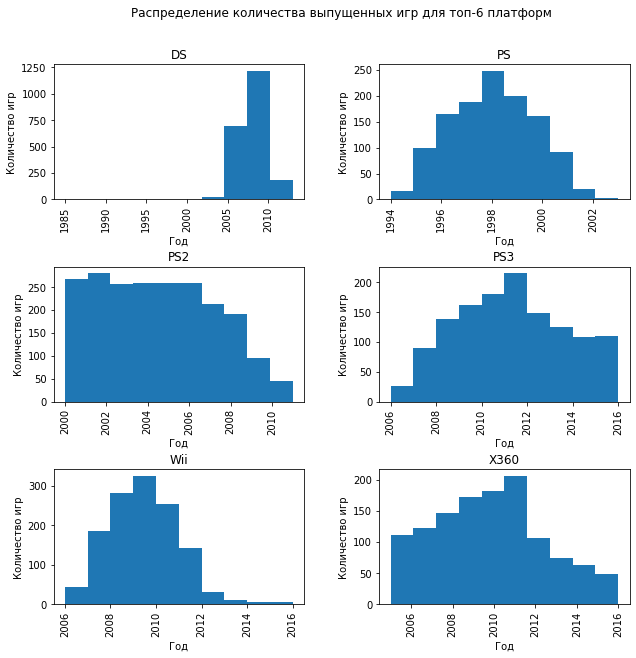

In [22]:
top=df.query('platform=="PS2" or platform=="X360" or platform=="PS3" or platform=="Wii" or platform=="DS" or platform=="PS"')
axarr=top['year_of_release'].hist(by=top['platform'], figsize=(10,10))
plt.suptitle('Распределение количества выпущенных игр для топ-6 платформ')

for ax in axarr.flatten():
    ax.set_xlabel("Год")
    ax.set_ylabel("Количество игр")
    
plt.show()

В целом для каждой из платформ характерно наличие фазы роста до пика продаж,после которого наблюдается постепенный спад, что свидетельствует о том, что платформа подходит к завершению своего жизненного цикла. Исходя из графиков распредления топ-6 платформ представленных выше - мы можем определить приблизительную продолжительность жизни каждой из этих платформ, рассчитва в течение какого периода основной выпуск игр:

* DS - около 5 лет
* PS - около 6 лет
* PS2 - около 9 лет
* PS3 - около 9 лет
* Wii - около 5 лет
* X360 - около 11 лет


In [23]:
#рассчитаем среднюю продолжительность жизни платформы
data = {'Platform':  ['DS', 'PS','DS2', 'PS3','Wii', 'X360'],
        'Period': [5, 6, 9, 9, 5, 11]}
data2 = pd.DataFrame (data, columns = ['Platform','Period'])
data2['Period'].median()

7.5

Округлим среднюю продолжительность жизни платформы до 8 лет.

Учитывая, тот факт, что индустрия игр весьма быстро и динамично развивается, актуальным периодом для построения прогноза на 2017 год - будем считать промежуток с 2014 по 2016 года.

In [24]:
#cоздаем срез по актуальным данным
df_new=df.query('year_of_release>=2014',engine='python')

Проверим в новом срезе сколько наблюдений представлено по каждой платформе.

In [25]:
df_new.groupby('platform')['name'].count()

platform
3DS     212
PC      151
PS3     219
PS4     376
PSP      13
PSV     295
Wii      11
WiiU     73
X360    111
XOne    228
Name: name, dtype: int64

In [26]:
len(df_new)

1689

Объем выборки достаточный для проведения дальнейшего анализа.

* **Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [27]:
df_new.pivot_table(index='platform', values='total_sale', aggfunc='sum').nlargest(10, 'total_sale')

,total_sale
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


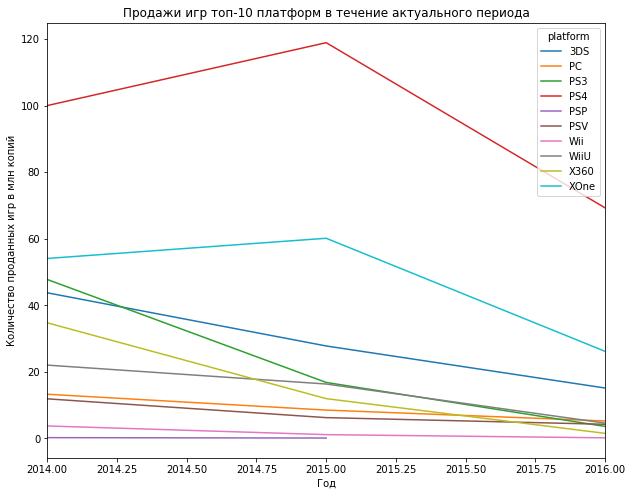

In [28]:
df_new_top=df_new.query('platform=="PS3" or platform=="X360" or platform=="Wii" or platform=="DS" or platform=="PS4" or platform=="3DS" or platform=="XOne" or platform=="PC" or platform=="PSP" or platform=="WiiU" or platform=="PSV"')

gr = df_new_top.pivot_table(index='year_of_release', columns='platform', values='total_sale', aggfunc='sum')
gr.plot(figsize=(10,8))
plt.xlabel('Год')
plt.ylabel('Количество проданных игр в млн копий')
plt.title('Продажи игр топ-10 платформ в течение актуального периода')
plt.show()

На представленном выше графике мы видим, что большинство платформ лидирующих по суммарным продажам за актуальный период, в последние 3-4 года уже нахоятся на последних этапах своего жизненного цикла. На их фоне выделяются 2 платформы PS4 и XOne, которst находятся с 2013 в фазе активного роста, достигая своего пика в 2015, в 2016 количество проданных игр на данных платформах уже снизилось, однако данный факт может объсняться тем, что данные за 2016 год в нашей выборке могут быть представлены не в полном объеме. Таким образом, в качестве потенциально прибыльных платформ можем рассматривать PS4 и XOne.

* **Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**

/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


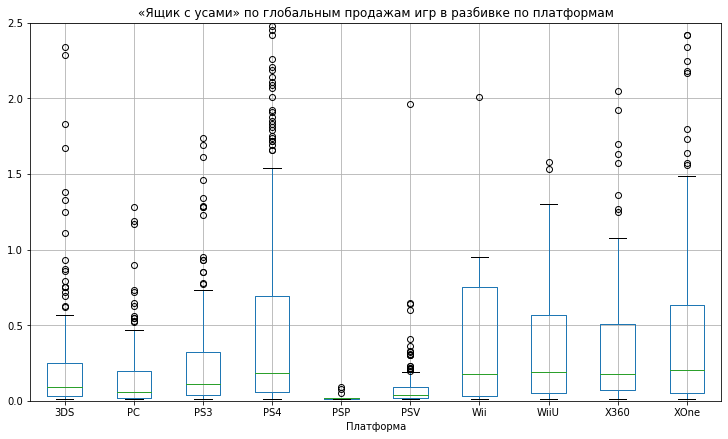

In [29]:
df_new.boxplot(column=['total_sale'],by='platform', figsize=(12,7))
plt.ylim(0, 2.5)
plt.xlabel('Платформа')
plt.title('«Ящик с усами» по глобальным продажам игр в разбивке по платформам')
plt.suptitle('')
plt.show()

In [30]:
df_new.pivot_table(index='platform', values='total_sale', aggfunc='median').nlargest(10, 'total_sale')

,total_sale
platform,
XOne,0.205
WiiU,0.190
PS4,0.185
Wii,0.180
X360,0.180
PS3,0.110
3DS,0.090
PC,0.060
PSV,0.040


На основе представленного выше графика, мы можем сказать, что наибольшие средние общие продажи за актуальный период наблюдаются у платформ XOne, Wiiu, PS4, Wii и X360. 

Рейтинги топ-10 платформ по суммарным продажам и топ-10 по среднему значению продаж имеют некоторые различия: по суммарным продажам лидирует PS4, в то время как по среднему значению продаж первое место занимает ХOne. Также стоит отметить, что в топ-10 по среднему значению платформа Wii занимает 4 место, в то время как в топ-10 по суммарным продажам за последние несколько лет данная платформа заняла только 9 место.

* **Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

В качестве примера рассмотрим платформу PS4, которая находится в фазе активного роста и занимает 3 место по суммарным продажам среди остальных платформ за последние несколько лет.

In [31]:
#создаем срез по платформе PS4
ps4=df_new.query('platform=="PS4"')

In [32]:
ps4[['user_score','critic_score','total_sale']].corr(method='pearson')

,user_score,critic_score,total_sale
user_score,1.000000,0.546434,-0.040132
critic_score,0.546434,1.000000,0.402661
total_sale,-0.040132,0.402661,1.000000


Коэффициент корреляции пирсона свидетельствует о крайне слабой обратной связи (можно сказать даже её отсутствии) между оценкой пользователей и продажами, в то время как коффициент корреляции оценки критиков и продаж говорит о  наличии прямой связи средней силы между данными переменными. Проверим данные выводы на графиках.


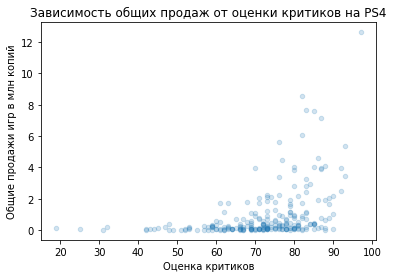

In [33]:
ps4.plot(x='critic_score', y='total_sale', kind='scatter', alpha=0.2) 
plt.ylabel('Общие продажи игр в млн копий')
plt.xlabel('Оценка критиков')
plt.title('Зависимость общих продаж от оценки критиков на PS4')
plt.show()

На представленном выше графике мы наблюдаем следующую закономерность: с ростом оценки критиков увеличиваются продажи игр.

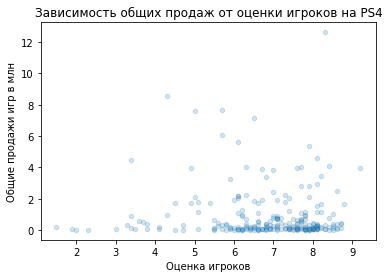

In [34]:
ps4.plot(x='user_score', y='total_sale', kind='scatter', alpha=0.2) 
plt.ylabel('Общие продажи игр в млн')
plt.xlabel('Оценка игроков')
plt.title('Зависимость общих продаж от оценки игроков на PS4')
plt.show()

На графике заивисимости уровня продаж от оценки игроков ярко выраженной закономерной взаимосвязи данных величин не наблюдается.

На примере платформы PS4, мы можем сделать вывод о том, что уровни продаж зависят от оценки критиков, в то время как взаимосвязь с оценкой пользователей не наблюдается.

In [35]:
#рассчитаем коэффициент корреляции общих продаж и оценки пользователей
lists=["XOne", "3DS", "PS3", "X360"]
tops=df_new.query('platform in @lists')
tops.groupby('platform')[['user_score','total_sale']].corr().iloc[0::2,-1]

platform            
3DS       user_score    0.215193
PS3       user_score   -0.166761
X360      user_score   -0.138445
XOne      user_score   -0.070384
Name: total_sale, dtype: float64

In [36]:
#рассчитаем коэффициент корреляции общих продаж и оценки критиков
lists=["XOne", "3DS", "PS3", "X360"]
tops=df_new.query('platform in @lists')
tops.groupby('platform')[['critic_score','total_sale']].corr().iloc[0::2,-1]

platform              
3DS       critic_score    0.314117
PS3       critic_score    0.446575
X360      critic_score    0.525723
XOne      critic_score    0.428677
Name: total_sale, dtype: float64

Исходя из коэффициентов корреляции, можно сделать вывод о том, что и на других игровых платформах так же как и на PS4 оценки критиков и общие продажи имеют прямую связь средней силы, в то время оценки пользователей и общие продажи практически не имеют какой-либо значимой взаимосвязи.

Ниже рассмотрим зависимость оценок пользователей (критиков) и общих продаж на графиках

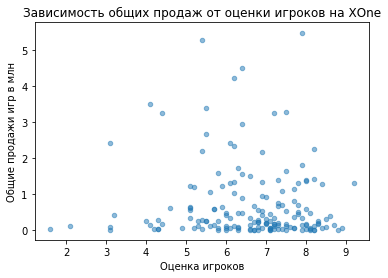

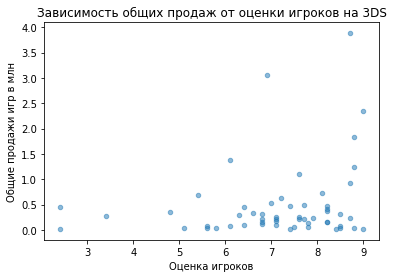

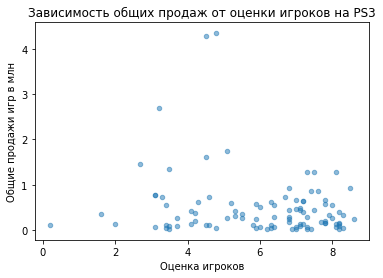

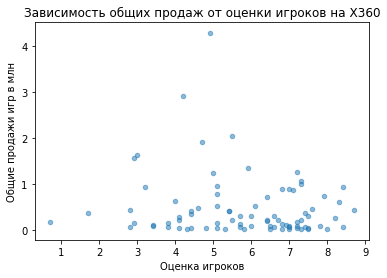

In [37]:
dictionary={"XOne":{'title':'Зависимость общих продаж от оценки игроков на XOne'},
           "3DS":{'title':'Зависимость общих продаж от оценки игроков на 3DS'},
           "PS3":{'title':'Зависимость общих продаж от оценки игроков на PS3'}, 
           "X360":{'title':'Зависимость общих продаж от оценки игроков на X360'}}

for key,value in dictionary.items():    
        df_new.query('platform==@key').plot(x='user_score', y='total_sale', kind='scatter', alpha=0.5)       
        plt.ylabel('Общие продажи игр в млн')
        plt.xlabel('Оценка игроков')
        plt.title(value['title'])
        plt.show()


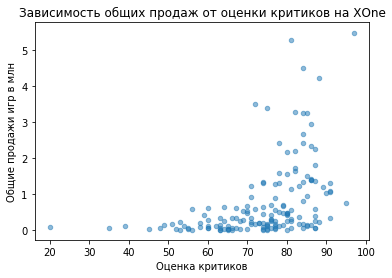

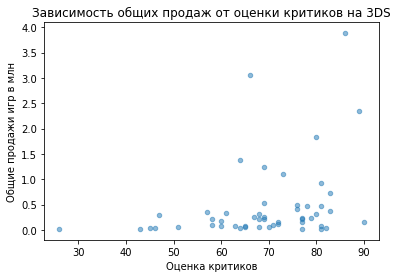

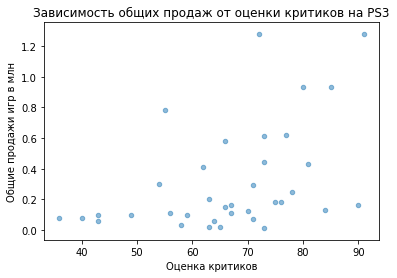

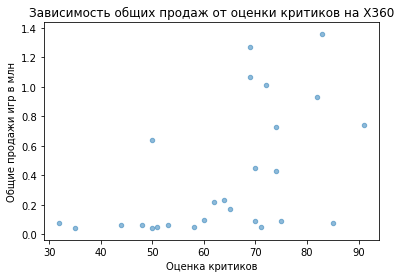

In [38]:
dictionary={"XOne":{'title':'Зависимость общих продаж от оценки критиков на XOne'},
           "3DS":{'title':'Зависимость общих продаж от оценки критиков на 3DS'},
           "PS3":{'title':'Зависимость общих продаж от оценки критиков на PS3'}, 
           "X360":{'title':'Зависимость общих продаж от оценки критиков на X360'}}

for key,value in dictionary.items():    
        df_new.query('platform==@key').plot(x='critic_score', y='total_sale', kind='scatter', alpha=0.5)       
        plt.ylabel('Общие продажи игр в млн')
        plt.xlabel('Оценка критиков')
        plt.title(value['title'])
        plt.show()

На графиках других платформ так же видно, что с ростом оценок критиков растут и общие продажи, в то время как зависимость оценок пользователей и общих продаж почти не наблюдается.

* **Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

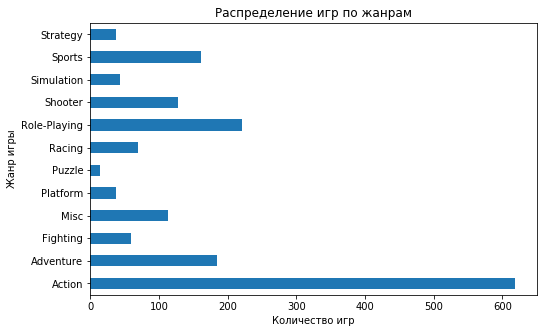

In [39]:
df_new.pivot_table(index='genre', values='name',aggfunc='count').plot(kind='barh',figsize=(8,5))
plt.ylabel('Жанр игры')
plt.xlabel('Количество игр')
plt.title('Распределение игр по жанрам')
plt.legend().remove()

Наибольшее количество игр с 2008 по 2016 года выпускалось в жанрах Action, Misc, Sports, Adventure и Role-playing.

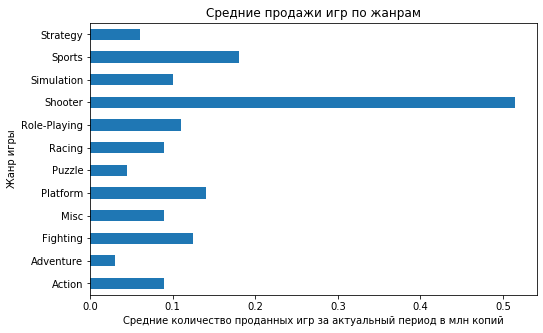

In [40]:
df_new.pivot_table(index='genre', values='total_sale',aggfunc=['median']).plot(kind='barh',figsize=(8,5))
plt.ylabel('Жанр игры')
plt.xlabel('Средние количество проданных игр за актуальный период в млн копий')
plt.title('Средние продажи игр по жанрам')
plt.legend().remove()

Наиболее прибыльными жанрами оказались shooter, platform, sports и fighting, так как среднее значение их продаж являлось наиболее высоким в сравнении с остальными. А adventure, puzzle и strategy являлись жанрами с наименьшим средним значением продаж.

### Вывод

На данном этапе анализа мы определили актуальный период для проведения дальнейшего анализа. Он составил 8 лет - с 2008 по 2016 год. Также мы выявили потенциально прибыльные платформы - PS4 и Xone, которые в актуальный период находятся в активной фазе роста своего жизненного цикла. На примере платформы PS4, мы пришли к выводу о том, что на уровень продаж имет прямую связь с оценками критиков, в то время как оценка пользователей оказывает существенного влияния на количество проданных игр. Жанрами с наиболее высоким уровнем продаж являются shooter, platform, sports и fighting.    

## Портрет пользователей <a id="step5"></a> 

* **Определите для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). Опишите различия в долях продаж.**

In [41]:
dt=df[['na_sales', 'eu_sales', 'jp_sales']]

for column in dt:
    display(df_new.pivot_table(index='platform', values=column, aggfunc='sum').nlargest(5, column))
    

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31


Топ-5 платформ в Европе и Северной мерике практически совпадает по своему составу. Значительно отличается рейтинг платформ по продажам в Японии. Все места в топ-5 занимают платформы японских разработчиков и отсутсвует амеркианская консоли Х360 и XOne. Данное различие можно объяснить спецификой потребительского рынка Японии: скорее всего, японские разработчики могут лучше понять потребности и интересы игроков своей же культуры, а значит создают более востребованный продукт для своих сограждан.

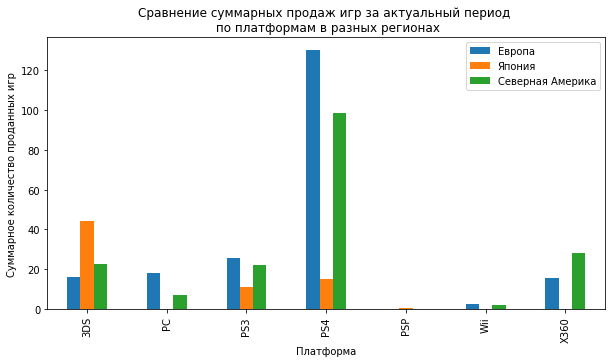

In [42]:
list_p = ["X360","PS3","Wii", "DS", "PS4", "PC", "3DS", "DS", "PSP"]

dp=df_new.query('platform in @list_p')
dp.pivot_table(index='platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar', figsize=(10,5)) 
plt.title('Cравнение суммарных продаж игр за актуальный период \n по платформам в разных регионах')
plt.xlabel('Платформа')
plt.ylabel('Cуммарное количество проданных игр')
plt.legend (['Европа','Япония','Северная Америка'])
plt.show()

* **Самые популярные жанры (топ-5). Поясните разницу.**

In [43]:
for column in dt:
    display(df_new.pivot_table(index='genre', values=column, aggfunc='sum').nlargest(5, column))

,na_sales
genre,
Shooter,79.02
Action,72.53
Sports,46.13
Role-Playing,33.47
Misc,15.05


,eu_sales
genre,
Action,74.68
Shooter,65.52
Sports,45.73
Role-Playing,28.17
Racing,14.13


,jp_sales
genre,
Role-Playing,31.16
Action,29.58
Fighting,6.37
Misc,5.61
Shooter,4.87


Рейтинг жанров практически совпадает (за исключением 5 места) в Европе и Северной Америке, что говорит о схожести интресов пользователей двух данных регионов. В Японии же лидером рейтинга является жанр ролевых игр, который в Европе и Северной Америке закрывает топ-5. Также в Японии не пользуются большой полпулярность шутеры в отличие от других регионов. Однако игры жанра action популярны во всех регионах. В Японии пользовательские интересы имеют значительные отличия в силу культурных особенностей жителей данной страны.

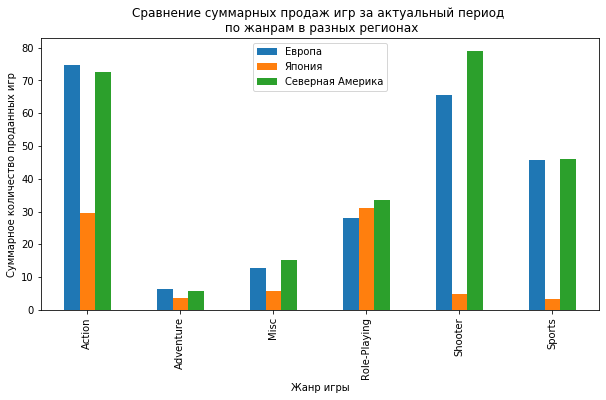

In [44]:
dg=df_new.query('genre=="Action" or genre=="Shooter" or genre=="Sports" or genre=="Misc" or genre=="Role-Playing" or genre=="Adventure"')
dg.pivot_table(index='genre', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar', figsize=(10,5))
plt.title('Cравнение суммарных продаж игр за актуальный период \n по жанрам в разных регионах')
plt.xlabel('Жанр игры')
plt.ylabel('Cуммарное количество проданных игр')
plt.legend (['Европа','Япония','Северная Америка'])
plt.show()

* **Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

In [45]:
for column in dt:
    a=df_new.pivot_table(index='rating', values=column, aggfunc=['sum', 'count'])
    a.columns=[column,'count']
    display(a.sort_values(by=column,ascending=False))

,na_sales,count
rating,,
M,96.42,265
Unknown,64.72,749
E,50.74,219
T,38.95,271
E10+,33.23,185


,eu_sales,count
rating,,
M,93.44,265
Unknown,58.95,749
E,58.06,219
T,34.07,271
E10+,26.16,185


,jp_sales,count
rating,,
Unknown,56.90,749
T,14.78,271
E,8.94,219
M,8.01,265
E10+,4.46,185


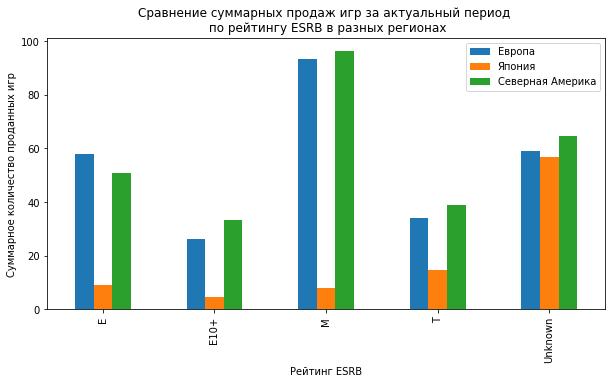

In [46]:
df_new.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum').plot(kind='bar', figsize=(10,5))
plt.title('Cравнение суммарных продаж игр за актуальный период \n по рейтингу ESRB в разных регионах')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Cуммарное количество проданных игр')
plt.legend (['Европа','Япония','Северная Америка'])
plt.show()

В Европе и Северной Америке больше продается игр с присвоенным рейтингом от 17 лет и старше,где могут содержаться сцены с достаточно жестоким наисилием, нецензурной лексикой и т.п. с минимальным количеством насилия. На втором по пулярности месте для западных польователей являются игры с рейтингом от 6 лет и старше. Для Японии же бОльшее количество игр в нашей выборки с неопределенным рейтингом, что может говорить о том, что в данной стране могут присваиваться свои собственные возрастные ограничения, не связанные c организацией ESRB. Если же рассматривать игры с наличием рейтинга, то пользователеи Японии более склонны к приобретению игр с рейтингом от 13 лет и старше.

### Вывод

На данном этапе мы составили портрет пользователей каждого региона:
* западными пользователями из Европы и Северной Америки наиболее востребованы платформы X360, PS3 и Wii, в то время как на рынке в Японии большей популярностью пользуются 3DS, DS и PS3;
* интересы в жанрах у пользователей из Европы и Северной Америки совпадают: они предпочитают action, shooter и sports; а в Японии игроки предпочитают role-playing и action;
* в Европе и Северной Америке пользователи склонны больше покупать игры с возрастным цензом от 17 лет. В Японии в значительной степени востребованы игры для подростков от 13 лет. Однако наибольшие продажи на данном рынке наблюдаются у игр без рейтинга ESRB.

## Проверка гипотез <a id="step6"></a> 

* **Средние пользовательские рейтинги платформ Xbox One и PC одинаковые**

Для начала сформулируем нулевую и альтернативную гипотезу:

*H0*: средние пользовательские рейтинги платформ Xbox One и PC равны.

*H1*: средние пользовательские рейтинги платформ Xbox One и PC не равны.

In [47]:
#cоздаем необходимые выборки для проверки гипотез, удаляя пропущенные значения
xone = df_new.query('platform == "XOne"')['user_score'].dropna()
pc = df_new.query('platform == "PC"')['user_score'].dropna()

Проверяем размеры получившихся выборок.

In [48]:
len(xone)

165

In [49]:
len(pc)

122

Каждая выборка имеет достаточное количество наблюдений, для получения статистически значимых выводов.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей применяется метод scipy.stats.ttest_ind(), использующий критерий Стьюдента. Для применения данного метода необходимо указать параметр, задающий считать ли равными дисперсии выборок. Поэтому для начала рассчитаем дисперсии наших выборок.

In [50]:
np.var(xone,ddof=1)

1.8910066518847013

In [51]:
np.var(pc,ddof=1)

2.901154315133451

Дисперсии выборок отличаются, поэтому параметр equal_var будет принимать значение False.

In [52]:
alpha = 0.05 #задаем уровень значимости

results = st.ttest_ind(xone, pc, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


На пятипроцентном уровне значимости у нас нет оснований отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC равны.

* **Средние пользовательские рейтинги жанров Action и Sports разные.**

Для начала сформулируем нулевую и альтернативную гипотезу:

*H0*: средние пользовательские рейтинги жанров Action и Sports  равны.

*H1*: средние пользовательские рейтинги жанров Action и Sports  не равны.

In [53]:
#cоздаем необходимые выборки для проверки гипотез, удаляя пропущенные значения
action = df_new.query('genre == "Action"')['user_score'].dropna()
sports = df_new.query('genre == "Sports"')['user_score'].dropna()

Проверяем размеры получившихся выборок.

In [54]:
len(action)

297

In [55]:
len(sports)

127

Каждая выборка имеет достаточное количество наблюдений, для получения статистически значимых выводов.

Для проверки гипотезы о равенстве средних двух генеральных совокупностей применяется метод scipy.stats.ttest_ind(), использующий критерий Стьюдента. Для применения данного метода необходимо указать параметр, задающий считать ли равными дисперсии выборок. Поэтому для начала рассчитаем дисперсии наших выборок.

In [56]:
np.var(action,ddof=1)

1.8984766584766581

In [57]:
np.var(sports,ddof=1)

3.446979127609048

Дисперсии выборок отличаются, поэтому параметр equal_var будет принимать значение False.

In [58]:
alpha = 0.05

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


На пятипроцентном уровне значимости мы отвергаем нулевую гипотезу о том, что средние пользовательские рейтинги платформ средние пользовательские рейтинги жанров Action и Sports равны.

In [59]:
df_new.query('genre=="Action" or genre=="Sports"').pivot_table(index='genre', values='user_score', aggfunc='mean')

,user_score
genre,
Action,6.760606
Sports,5.225197


Пользовательская оценка игр жанра action выше, чем у sports.

### Вывод

На данном этапе исследования мы не смогли опровергнуть гипотезу о том, что пользовательские рейтинги на платформах Xbox One и PC одинаковые. Однако смогли отвергнуть нулевую гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports равны: у жанра экшн средний пользовательский рейтинг выше.

## Общие выводы <a id="step7"></a> 

В результате проведенного исследовательского анализа можно следующие выводы:

* в качестве потенциально прибыльных платформ можно рассматривать PS4 и XOne, которые находтся в фазе активного роста своего жизненного цикла, а значит спрос на игры данных платформ может расти в следующем году;
* во всех регионах продаж можно продвигать игры на платформе PS3, однако стоит отметить, что у западных пользователей большой популярностью также пользуется X360, в то время как в Японии наиболее востребованы 3DS и DS;
* интересы в жанрах у пользователей из Европы и Северной Америки полностью совпадают: они предпочитают action, shooter и sports; а в Японии игроки предпочитают role-playing и action;
* в Европе пользователи склонны больше покупать игры с возрастным цензом от 17 лет, данные игры также на втором месте по популярности в Северной Америке. На первом месте в Америке - игры от 6 лет, которые также лидируют по продажам и в Японии. Также в Японии в значительной степени востребованы игры для подростков от 13 лет;
* продвигать лучше игры с более высокими оценками критиков, как правило их уровень продаж выше, а вот оценки пользовтелей не имеют значительную взаимосвязь с уровнем продаж;
* однако если учитывать рейтинги пользоватлей, то стоит обратить внимание на то, что средний рейтинг игроков жанра экшн выше чем средний рейтинг спортивных игр.

Все представленные выше выводы можно учитывать при составлении рекламной кампании на следующий год и настройки таргета.